## Importing Libraries

In this notebook, we'll examine the impact of choosing n in our n-grams across two libraries of texts. Onelibrary is comprised of several full-length novels, while another consists of articles of varying lenghts. We'llﬁrst deﬁne several helper functions that will be re-used throughout this process (each one is commented).We'll then proceed to evaluate our choice of n, per library, and then ﬁnally, use that n-value to compare ourlibrary of texts and return Jaccard similarity values for the more similiar texts.

In [117]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

## Defining Functions

In [118]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

## Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### Running for Books

In [77]:
dir = 'C://Users//manya//Documents//NLP//'


In [78]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'Books//',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

Plot the distributions

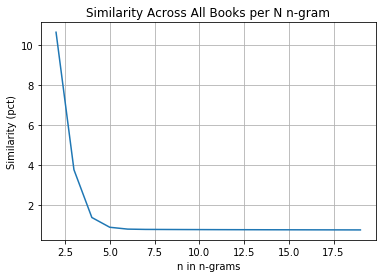

In [5]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

## Books measuring similarity

Looking at the above chart, it looks like the similarity between the books drops off around n=5, so that is the n value that I will select. I will select a threshold of -1 to start, because that is what we have used before, and I will adjust it if it seems necessary after running the comparison. 

In [123]:
books_comparison = compare_files(dir+'Books//',ngram_size=5,threshold=-1)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

1
3boat10.txt is similar to Adventures_of_Sherlock_Holmes.txt with a Similarity Index of 0.067%


1
3boat10.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 0.042%


1
3boat10.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 0.046%


1
Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 1.838%


1
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 1.527%


1
Hound_of_the_Baskervilles.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 1.796%




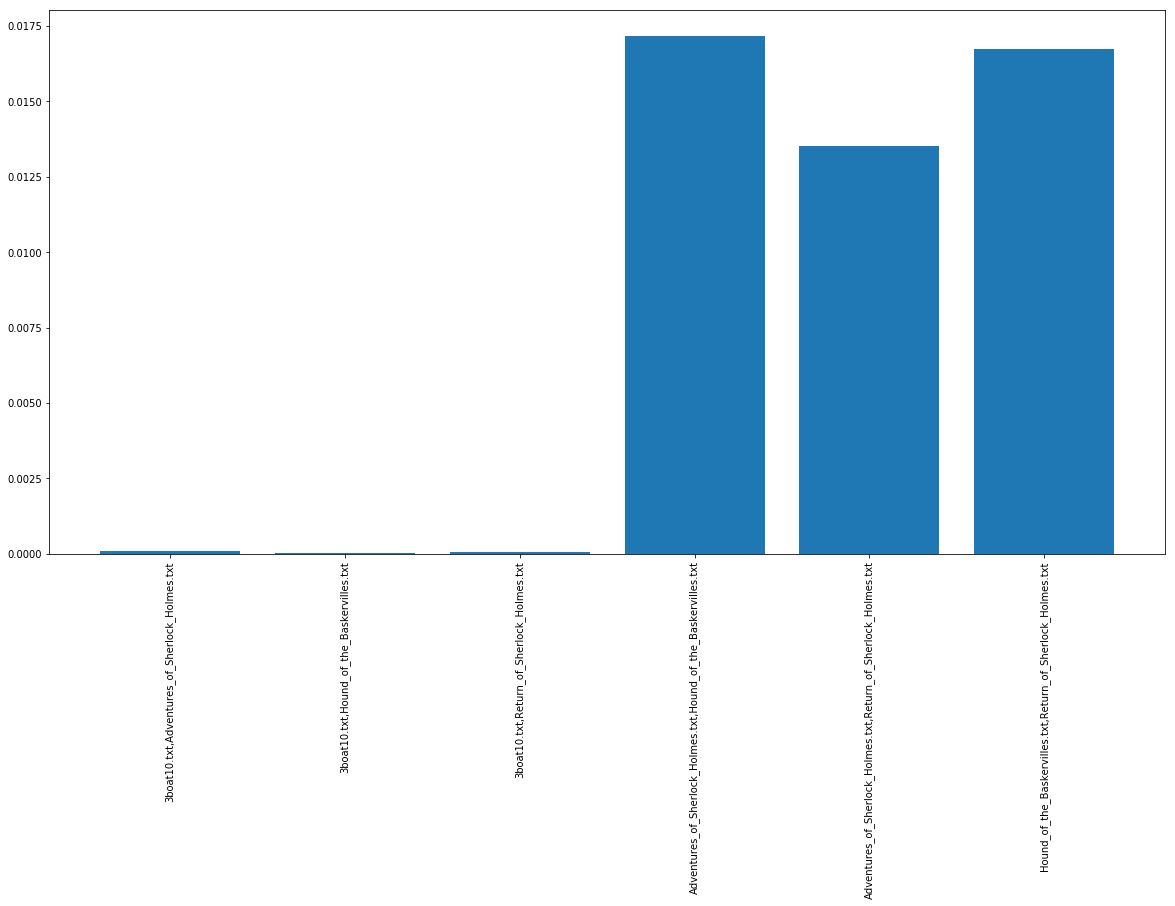

In [72]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90) 
plt.bar(*zip(*books_comparison.items()))
#plt.ylim([0, 1])
plt.show()

From the comparison and the graph, it looks like the most similar books are The Adventures of Sherlock Holmes and the Hound of Baskervilles, but the Hound of Baskervilles and The Return of Sherlock Holmes are pretty close too. Therefore, let's try cleaning the text to see if the result can tell us more about the true similarity of the books. 

In [82]:
book1 = 'Books//3boat10.txt'

In [88]:
f = open(dir+book1, encoding="utf8")
raw1 = f.read()

words = nltk.tokenize.word_tokenize(raw1)
fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 7773 samples and 79643 outcomes>


[(',', 5702),
 ('the', 3338),
 ('and', 3215),
 ('.', 3081),
 ('to', 1748),
 ('a', 1621),
 ('of', 1425),
 ('I', 1208),
 ('it', 1159),
 ('in', 931)]

In [107]:
book2 = 'Books//Adventures_of_Sherlock_Holmes.txt'
f = open(dir+book2, encoding="utf8")
raw2 = f.read()

words = nltk.tokenize.word_tokenize(raw2)
fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 9398 samples and 129162 outcomes>


[(',', 7779),
 ('.', 5867),
 ('the', 5420),
 ('I', 3034),
 ('and', 2871),
 ('of', 2733),
 ('to', 2729),
 ('``', 2723),
 ('a', 2595),
 ("''", 2392)]

In [111]:
book3 = 'Books//Hound_of_the_Baskervilles.txt'


f = open(dir+book3, encoding="utf8")
raw3 = f.read()

words = nltk.tokenize.word_tokenize(raw3)
fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 6529 samples and 73394 outcomes>


[(',', 3579),
 ('.', 3310),
 ('the', 3245),
 ('of', 1696),
 ('and', 1583),
 ('I', 1500),
 ('to', 1456),
 ("''", 1406),
 ('``', 1384),
 ('a', 1286)]

In [96]:
book4 = 'Books//Return_of_Sherlock_Holmes.txt'
f = open(dir+book4, encoding="utf8")
raw4 = f.read()

words = nltk.tokenize.word_tokenize(raw4)
fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 9409 samples and 138424 outcomes>


[(',', 8440),
 ('.', 6783),
 ('the', 5885),
 ('I', 3002),
 ('and', 2878),
 ('of', 2861),
 ('to', 2652),
 ('a', 2623),
 ('``', 2434),
 ("''", 2433)]

Yes, it looks like the most common tokens are punctuations and stopwords. Let's clean up the Sherlock Holmes books to see if that changes things:

In [108]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))

words = nltk.tokenize.word_tokenize(raw2)

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
#words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words = [word.lower() for word in words]

# Remove stopwords
words2 = [word for word in words if word not in stopwords]

fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 7850 samples and 100055 outcomes>


[('the', 5793),
 ('and', 3061),
 ('of', 2777),
 ('to', 2761),
 ('in', 1818),
 ('that', 1757),
 ('it', 1736),
 ('you', 1536),
 ('he', 1484),
 ('was', 1413)]

In [112]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))

words = nltk.tokenize.word_tokenize(raw3)

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
#words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words = [word.lower() for word in words]

# Remove stopwords
words3 = [word for word in words if word not in stopwords]

fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 5694 samples and 58702 outcomes>


[('the', 3515),
 ('of', 1716),
 ('and', 1696),
 ('to', 1488),
 ('that', 1159),
 ('it', 1023),
 ('in', 967),
 ('he', 921),
 ('you', 902),
 ('was', 805)]

In [113]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))

words = nltk.tokenize.word_tokenize(raw4)

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
#words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words = [word.lower() for word in words]

# Remove stopwords
words4 = [word for word in words if word not in stopwords]

fdist = nltk.FreqDist(words)

print(fdist)

#fdist.items() - will give all words
fdist.most_common(10)

<FreqDist with 7958 samples and 108241 outcomes>


[('the', 6441),
 ('and', 2984),
 ('of', 2930),
 ('to', 2692),
 ('that', 2174),
 ('in', 1905),
 ('it', 1881),
 ('was', 1827),
 ('he', 1769),
 ('you', 1727)]

In [110]:
#Write the cleaned books to .txt files

f = open("cleandASH.txt", "w")
f.write(str(words2))
f.close()

f = open("cleandHoB.txt", "w")
f.write(str(words3))
f.close()

f = open("cleandRSL.txt", "w")
f.write(str(words4))
f.close()

Now check similarity again:

In [120]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Cleanedbooks//',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

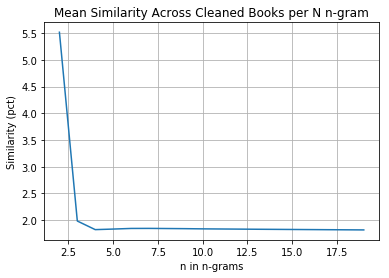

In [121]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across Cleaned Books per N n-gram')
plt.grid()
plt.show()

It looks like the bend happens around 4 now. Threshold = -1 seemed to work fine before, so I'll keep that. 

In [122]:
books_comparison = compare_files(dir+'Cleanedbooks//',ngram_size=4,threshold=-1)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

1
cleandASH.txt is similar to cleandHoB.txt with a Similarity Index of 2.013%


1
cleandASH.txt is similar to cleandRSL.txt with a Similarity Index of 1.544%


1
cleandHoB.txt is similar to cleandRSL.txt with a Similarity Index of 1.910%




It would appear that The Adventures of Sherlock Holmes and the Hound of Baskervilles are still the most similar, and in fact, the cleaning increased the margin of similarity from the second pairing. Thus, I'll name these two books as most similar. 

## Measuring similarity of Articles

Now let's examine the similairty of our set of articles using the same process as above.

In [6]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Articles//',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

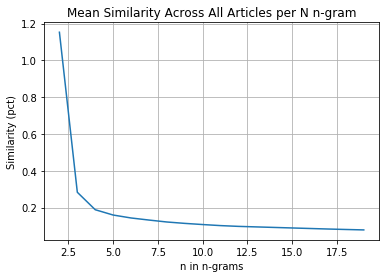

In [7]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

Looking at the above chart, it looks like the similarity between the articles drops off around n=4, so that is the n value that I will select. I will select a threshold of -1 to start, because that is what we have used before, and I will adjust it if it seems necessary after running the comparison. 

In [124]:
articles_comparison = compare_files(dir+'Articles/',ngram_size=4,threshold=-1)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article1.txt is similar to article10.txt with a Similarity Index of 0.233%


article1.txt is similar to article11.txt with a Similarity Index of 0.221%


article1.txt is similar to article12.txt with a Similarity Index of 0.000%


article1.txt is similar to article13.txt with a Similarity Index of 0.000%


article1.txt is similar to article14.txt with a Similarity Index of 0.000%


article1.txt is similar to article15.txt with a Similarity Index of 0.000%


article1.txt is similar to article16.txt with a Similarity Index of 0.000%


article1.txt is similar to article17.txt with a Similarity Index of 0.000%


article1.txt is similar to article18.txt with a Similarity Index of 1.807%


article1.txt is similar to article19.txt with a Similarity Index of 0.000%


article1.txt is similar to article2.txt with a Similarity Index of 0.000%


article1.txt is similar to article20.txt with a Similarity Index of 0.000%


article1.txt is similar to article21.txt with a Similarity Index of 0.000%




We have a lot of articles to compare here, so let's visualize the similarity indices to make it easier to identify the highest value. 

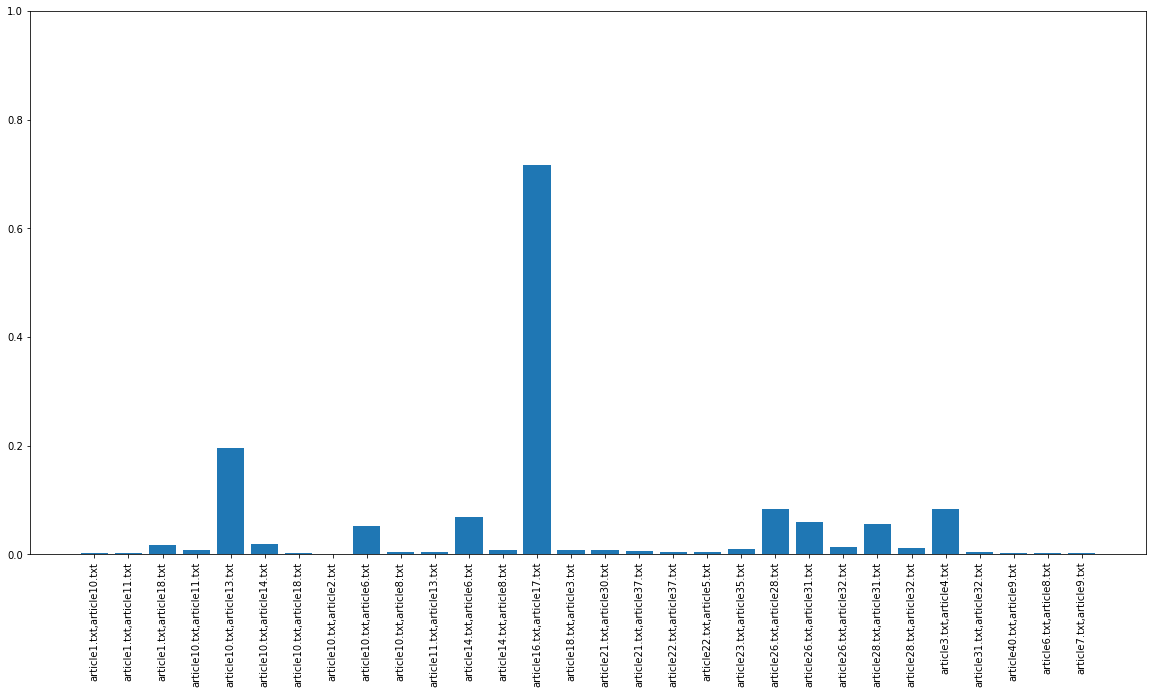

In [125]:
similar = {x:y for x,y in articles_comparison.items() if y!=0}

plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90) 
plt.bar(*zip(*similar.items()))
plt.ylim([0, 1])
plt.show()

It looks like the similarity between Article 16 and Article 17 is a clear winner, so I don't think any cleaning is necessary. Just to be safe, let's check a few n-values. 

In [126]:
articles_comparison = compare_files(dir+'Articles/',ngram_size=5,threshold=-1)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article1.txt is similar to article10.txt with a Similarity Index of 0.000%


article1.txt is similar to article11.txt with a Similarity Index of 0.000%


article1.txt is similar to article12.txt with a Similarity Index of 0.000%


article1.txt is similar to article13.txt with a Similarity Index of 0.000%


article1.txt is similar to article14.txt with a Similarity Index of 0.000%


article1.txt is similar to article15.txt with a Similarity Index of 0.000%


article1.txt is similar to article16.txt with a Similarity Index of 0.000%


article1.txt is similar to article17.txt with a Similarity Index of 0.000%


article1.txt is similar to article18.txt with a Similarity Index of 0.602%


article1.txt is similar to article19.txt with a Similarity Index of 0.000%


article1.txt is similar to article2.txt with a Similarity Index of 0.000%


article1.txt is similar to article20.txt with a Similarity Index of 0.000%


article1.txt is similar to article21.txt with a Similarity Index of 0.000%




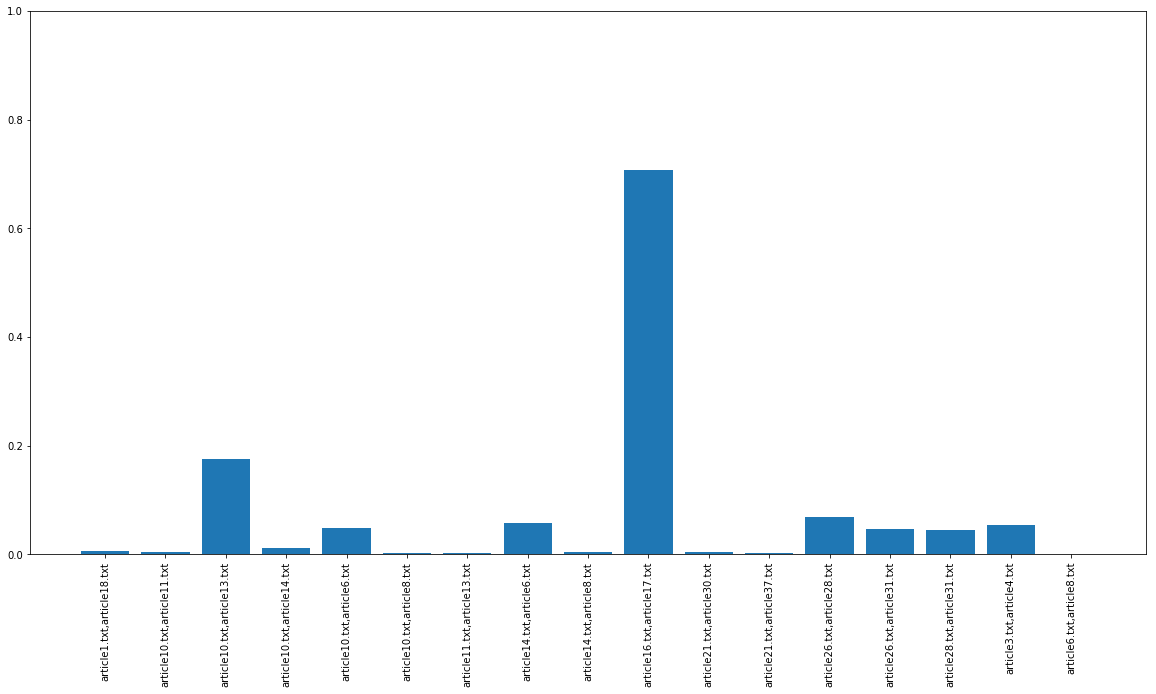

In [127]:
similar = {x:y for x,y in articles_comparison.items() if y!=0}

plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90) 
plt.bar(*zip(*similar.items()))
plt.ylim([0, 1])
plt.show()

In [128]:
articles_comparison = compare_files(dir+'Articles/',ngram_size=3,threshold=-1)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article1.txt is similar to article10.txt with a Similarity Index of 0.464%


article1.txt is similar to article11.txt with a Similarity Index of 0.448%


article1.txt is similar to article12.txt with a Similarity Index of 0.000%


article1.txt is similar to article13.txt with a Similarity Index of 0.000%


article1.txt is similar to article14.txt with a Similarity Index of 0.000%


article1.txt is similar to article15.txt with a Similarity Index of 0.000%


article1.txt is similar to article16.txt with a Similarity Index of 0.000%


article1.txt is similar to article17.txt with a Similarity Index of 0.000%


article1.txt is similar to article18.txt with a Similarity Index of 3.681%


article1.txt is similar to article19.txt with a Similarity Index of 0.000%


article1.txt is similar to article2.txt with a Similarity Index of 0.000%


article1.txt is similar to article20.txt with a Similarity Index of 0.000%


article1.txt is similar to article21.txt with a Similarity Index of 0.000%




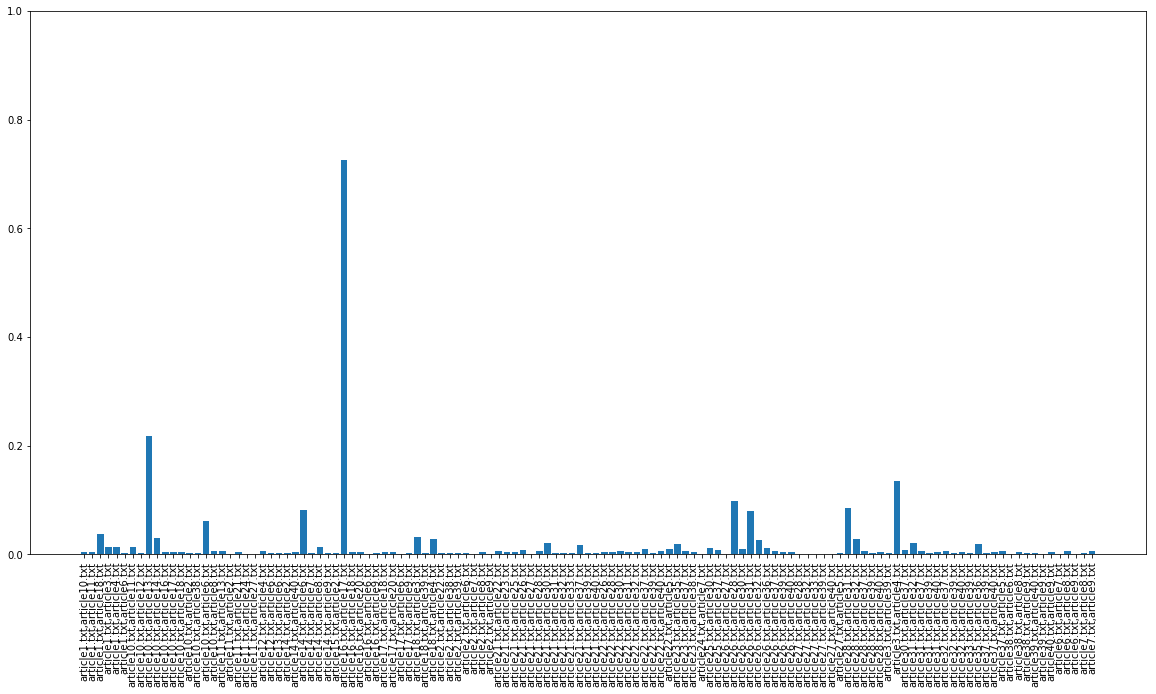

In [129]:
similar = {x:y for x,y in articles_comparison.items() if y!=0}

plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90) 
plt.bar(*zip(*similar.items()))
plt.ylim([0, 1])
plt.show()

It looks like Article 16 & Article 17 is still the clear winner. 

# Conclusion

I ended up choosing n=5 for the raw books, and n=4 for the cleaned books and articles. These numbers are pretty close, but I suppose in the context of n-grams, a 1-unit difference is significant. I think the raw books required a larger n-gram because books are longer and probably have more "filler" tokens then the articles. Similarly, the cleaned books required a smaller n-value because many of those extra filler words were removed. 